In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! git clone https://github.com/rahim-xelpmoc/searchformer.git

Cloning into 'searchformer'...
remote: Enumerating objects: 138, done.
remote: Counting objects: 100% (138/138), done.
remote: Compressing objects: 100% (88/88), done.
remote: Total 138 (delta 51), reused 129 (delta 46), pack-reused 0 (from 0)
Receiving objects: 100% (138/138), 2.14 MiB | 11.75 MiB/s, done.
Resolving deltas: 100% (51/51), done.


In [ ]:
! pip install -r /content/searchformer/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.3/266.3 kB 9.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 72.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 49.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━

In [ ]:
import sys
sys.path.append('/content/searchformer')

In [1]:
from openai import OpenAI,AzureOpenAI
from google.colab import userdata
from typing import Union, Optional, List
import json
from searchformer.maze import MazeTraceDataset,SimpleMazeTokenizer,MazeTrace
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import math
import copy
from glob import glob
from pathlib import Path as path_
import re

ModuleNotFoundError: No module named 'searchformer'

In [ ]:
client = OpenAI(api_key=userdata.get('OPENAI_API_KEY2'))

In [ ]:
with open("/content/drive/MyDrive/searchformer-maze/in-context-examples.json","r") as f:
    in_context_examples=json.load(f)

In [ ]:
messages=in_context_examples['messages']

In [ ]:
maze_trace_dataset=MazeTraceDataset(name="maze_trace_db")

In [ ]:
random_seed=42
# random_seed=0

In [ ]:
maze_trace_ds=maze_trace_dataset.generate(is_test=False,width=10,height=10,deterministic=True,seed=random_seed)

{'spec': {'width': 10, 'height': 10, 'start': {'x': 2, 'y': 1}, 'goal': {'x': 8, 'y': 3}, 'walls': [{'x': 1, 'y': 0}, {'x': 8, 'y': 0}, {'x': 9, 'y': 0}, {'x': 0, 'y': 1}, {'x': 5, 'y': 1}, {'x': 1, 'y': 2}, {'x': 6, 'y': 2}, {'x': 0, 'y': 3}, {'x': 2, 'y': 3}, {'x': 3, 'y': 3}, {'x': 7, 'y': 3}, {'x': 1, 'y': 4}, {'x': 2, 'y': 4}, {'x': 4, 'y': 4}, {'x': 5, 'y': 4}, {'x': 7, 'y': 4}, {'x': 8, 'y': 4}, {'x': 9, 'y': 4}, {'x': 0, 'y': 5}, {'x': 5, 'y': 5}, {'x': 6, 'y': 5}, {'x': 9, 'y': 5}, {'x': 3, 'y': 6}, {'x': 5, 'y': 6}, {'x': 0, 'y': 7}, {'x': 2, 'y': 7}, {'x': 3, 'y': 7}, {'x': 4, 'y': 7}, {'x': 6, 'y': 7}, {'x': 8, 'y': 7}, {'x': 0, 'y': 8}, {'x': 3, 'y': 8}, {'x': 7, 'y': 8}, {'x': 1, 'y': 9}, {'x': 2, 'y': 9}, {'x': 6, 'y': 9}]}, 'trace': [{'action': 'create', 'state': {'x': 2, 'y': 1}, 'cost_from_start': 0.0, 'heuristic': 8.0, 'path': ''}, {'action': 'close', 'state': {'x': 2, 'y': 1}, 'cost_from_start': 0.0, 'heuristic': 8.0, 'path': ''}, {'action': 'create', 'state': {'x':

In [ ]:
traces=list(maze_trace_ds.values())

In [ ]:
len(traces)

2

In [ ]:
for i,trace in enumerate(traces):
    with open(f"/content/drive/MyDrive/searchformer-maze/trace_{i}_seed_{random_seed}.json","w") as f:
        json.dump(trace,f)

In [ ]:
maze_tokenizer=SimpleMazeTokenizer(height=10,width=10)

In [ ]:
def generate_maze_board_without_border(prompt:list[str],height:int,width:int):
    maze_board=[[" " for _ in range(width)] for _ in range(height)]
    for i in range(0,len(prompt),3):
        object_=prompt[i]
        x=int(prompt[i+1])
        y=int(prompt[i+2])
        if object_=="wall":
            maze_board[x][y]="#"
        elif object_=="start":
            maze_board[x][y]="@"
        elif object_=="goal":
            maze_board[x][y]="."
    return maze_board

In [ ]:
def visualize_maze(prompt:list[list[str]],save_path=None):
# Initialize 5x5 grid
    prompt = list(reversed(prompt))
    height,width=len(prompt),len(prompt[0])
    grid = np.zeros((height, width), dtype=int)  # 0 = empty, 1 = wall, 2 = start, 3 = goal #type:ignore

    for i in range(height):
        for j in range(width):
            if prompt[i][j] == "#":
                grid[i][j] = 1
            elif prompt[i][j] == "@":
                grid[i][j] = 2
            elif prompt[i][j] == ".":
                grid[i][j] = 3
    colors = {
        0: 'white',   # empty
        1: 'black',   # wall
        2: 'green',   # start
        3: 'red'      # goal
    }

    fig, ax = plt.subplots()
    for i in range(height):
        for j in range(width):
            color = colors[grid[i][j]]
            rect = plt.Rectangle((j, i), 1, 1, facecolor=color, edgecolor='gray')
            ax.add_patch(rect)

    # Axis settings
    ax.set_xlim(0, width)
    ax.set_ylim(0, height)
    ax.set_xticks(np.arange(0, width + 1))
    ax.set_yticks(np.arange(0, height + 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_aspect('equal')
    ax.grid(True)
    plt.title(f"{width}x{height} Maze Visualization")
    if save_path is not None:
        plt.savefig(save_path)
    plt.show()


In [ ]:
def get_neighbors(r, c, maze):
    neighbors = []
    rows, cols = len(maze), len(maze[0])
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # up, down, left, right
    for dr, dc in directions:
        nr, nc = r + dr, c + dc
        if 0 <= nr < rows and 0 <= nc < cols and maze[nr][nc] in {' ', '.', '@'}:
            neighbors.append((nr, nc))
    return neighbors

def get_adjacency_list(maze):
    adjacency_list = {}
    for i in range(len(maze)):
        for j in range(len(maze[0])):
            if maze[i][j] in {' ', '.', '@'}:
                adjacency_list[(i, j)] = get_neighbors(i, j, maze)

    return adjacency_list


In [ ]:
def visualize_adjacency_list(adjacency_list,save_path=None):
    G = nx.Graph()
    for node, neighbors in adjacency_list.items():
        for neighbor in neighbors:
            G.add_edge(node, neighbor)

    pos = {node: (node[1], node[0]) for node in G.nodes()}  # Invert y-coordinates for correct display.
    nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10)
    plt.title("Maze Adjacency List Visualization")
    if save_path is not None:
        plt.savefig(save_path)
    plt.show()

In [ ]:
class MinHeap:
    def __init__(self):
        self.heap = dict()

    def push(self, key, value):
        self.heap[key] = value
        return "Push successful."

    def contains(self, key):
        return key in self.heap

    def update_value(self, key, value):
        self.heap[key] = value
        return "The value of the provided key has been updated."

    def pop(self):
        min_key = min(self.heap, key=self.heap.get)
        del self.heap[min_key]
        return min_key

    def __len__(self):
        return len(self.heap)

    def is_empty(self):
        return len(self.heap) == 0

    def __repr__(self):
        return self.heap.__repr__()

In [ ]:
class Costs:
    def __init__(self, graph):
        self.costs = {node_id: float('inf') for node_id in graph.keys()}

    def update(self, node, cost):
        self.costs[node] = cost
        return "The `costs` dictionary has been updated."

    def fetch(self, node):
        return self.costs[node]

In [ ]:
class Visited:
    def __init__(self):
        self.visited = set()

    def add(self, element):
        self.visited.add(element)
        return "The provided element has been added to the set."

    def contains(self, element):
        return element in self.visited

In [ ]:
class Path:
    def __init__(self, graph):
        self.path = {node_id: -1 for node_id in graph.keys()}

    def update(self, node, previous_node):
        self.path[node] = previous_node
        return "Update successful."

    def trace(self, from_node: int) -> list:
        reverse_path_trace = []
        current = from_node
        while current != -1:
            reverse_path_trace.append(current)
            current = self.path[current]
        final_path_trace = reverse_path_trace[::-1]
        return final_path_trace

In [ ]:
import time

In [ ]:
class FewShotSearchAStarMazeNavigation:
    def __init__(
            self,
            client: OpenAI,
            model: str,
            graph: dict,
            messages: List[dict],
            input_seq: str
    ):
        self.client = client
        self.model = model
        self.graph = graph
        self.messages = copy.deepcopy(messages)
        self.input_seq = input_seq
        self.verbose=""
        self.messages.append({'role': "user", 'content': input_seq})

    def initialize_heap(self):
        self.heap = MinHeap()
        return "An empty priority queue has been initialized."

    def initialize_visited(self):
        self.visited = Visited()
        return "An empty set has been initialized."

    def initialize_costs(self):
        self.costs = Costs(self.graph)
        return "An empty dictionary has been initialized."

    def initialize_path(self):
        self.path = Path(self.graph)
        return "An empty data structure (to store path related information) has been initialized."

    def chat_completion(
            self,
            messages: List[dict],
            model: str,
            temperature: float = 0.2,
            max_tokens: int = 4096,
            n: int = 1,
            stop: str = "\nObservation:",
            **kwargs
    ) -> str:
        response = self.client.chat.completions.create(
            messages=messages,
            model=model,
            temperature=temperature,
            max_tokens=max_tokens,
            n=n,
            stop=stop,
            **kwargs
        )
        completion=response.choices[0].message.content
        if len(completion)==0:
            print(response)
        time.sleep(2)
        return response.choices[0].message.content

    def react_loop(self, step_limit: Optional[int] = None):
        i = 0
        while True:
            if step_limit is not None and i >= step_limit:
                m="Step limit reached! Breaking the ReAct loop..."
                self.verbose+=m
                print(m)
                break
            completion = self.chat_completion(self.messages, model=self.model)

            self.verbose+=completion+"\n"
            print(completion)
            j = 0
            while len(completion) == 0:
                # Sometimes, the OpenAI API is returning an empty string. In such cases, calling the API again is solving the issue.
                print("***")
                print("EMPTY COMPLETION!!! Trying again...")
                completion = self.chat_completion(self.messages, model=self.model)
                print(completion)
                print("***")
                j += 1
                if j >= 10:
                    break
            # print("---")
            self.verbose+="---\n"
            print("---")
            if 'The search was unsuccessful!' in completion or 'The final path is:' in completion:
                self.messages.append({'role': "assistant", 'content': completion})
                self.verbose+="-- end of search --"
                return "-- end of search --"
            else: # A tool call was made.
                tool_call_string = completion.split('Action: ')[-1].strip()
                if 'initialize_heap' in tool_call_string or 'initialize_visited' in tool_call_string or 'initialize_costs' in tool_call_string or 'initialize_path' in tool_call_string or 'costs.update' in tool_call_string or 'costs.fetch' in tool_call_string or 'heap.push' in tool_call_string or 'heap.is_empty' in tool_call_string or 'heap.pop' in tool_call_string or 'heap.contains' in tool_call_string or 'visited.add' in tool_call_string or 'visited.contains' in tool_call_string or 'path.update' in tool_call_string or 'path.trace' in tool_call_string:
                    tool_call_string = tool_call_string.replace('initialize_heap', 'self.initialize_heap')
                    tool_call_string = tool_call_string.replace('initialize_visited', 'self.initialize_visited')
                    tool_call_string = tool_call_string.replace('initialize_costs', 'self.initialize_costs')
                    tool_call_string = tool_call_string.replace('initialize_path', 'self.initialize_path')
                    tool_call_string = tool_call_string.replace('costs.update', 'self.costs.update')
                    tool_call_string = tool_call_string.replace('costs.fetch', 'self.costs.fetch')
                    tool_call_string = tool_call_string.replace('heap.push', 'self.heap.push')
                    tool_call_string = tool_call_string.replace('heap.is_empty', 'self.heap.is_empty')
                    tool_call_string = tool_call_string.replace('heap.pop', 'self.heap.pop')
                    tool_call_string = tool_call_string.replace('heap.contains', 'self.heap.contains')
                    tool_call_string = tool_call_string.replace('visited.add', 'self.visited.add')
                    tool_call_string = tool_call_string.replace('visited.contains', 'self.visited.contains')
                    tool_call_string = tool_call_string.replace('path.update', 'self.path.update')
                    tool_call_string = tool_call_string.replace('path.trace', 'self.path.trace')
                    result = eval(tool_call_string)
                    print(result)
                    print("---")
                    self.verbose+=str(result)+"\n"
                    self.verbose+="---\n"
                else:
                    self.verbose+="Invalid tool call string!"
                    raise AssertionError("Invalid tool call string!")
                completion += "\nObservation:\n"
                self.messages.append({'role': "assistant", 'content': completion})
                self.messages.append({'role': "user", 'content': str(result)})
            i += 1


In [ ]:
trace_file_paths=glob("/content/drive/MyDrive/searchformer-maze/maze-traces/*.json")
len(trace_file_paths)

30

In [ ]:
def pretty_print_dict(d:dict)->str:
    j=len(d)
    s="{"
    for i, (k,v) in enumerate(d.items()):
        if i==0:
            s+=f"{k}:{v},\n"
        elif i==j-1:
            s+=f" {k}:{v}"
        else:
            s+=f" {k}:{v},\n"
    s+="}"
    return s

In [ ]:
trace_file_paths.sort()

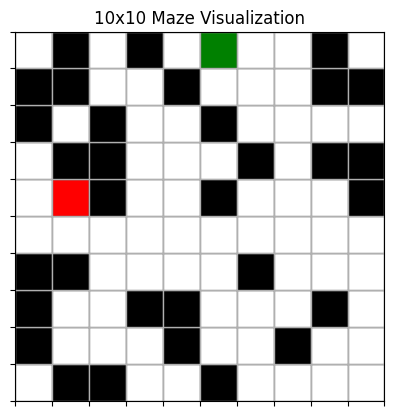

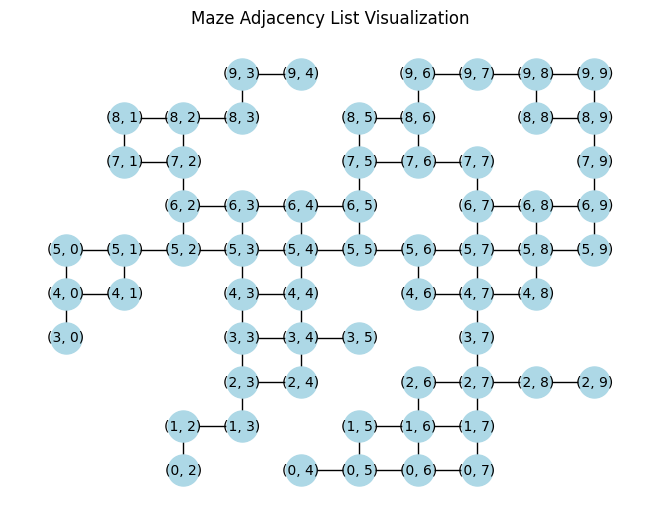

Streaming output truncated to the last 5000 lines.
---


The current neighbor is not present in `heap`. Pushing it (along with its estimated value) into `heap`.

Action: heap.push(4, 8)

---
Push successful.
---


Checking whether the current node has any more neighbors left.

Yes it does. Moving on to the next neighbor.

---
The current neighbor is: 6

Fetching the previously known cost of the current neighbor from the `costs` dictionary.

Action: costs.fetch(node=6)

---
inf
---


The previously known cost is inf.

The newly discovered cost of the current neighbor is equal to the cost of the current node plus 1.
Newly discovered cost = 0 + 1 = 1

Checking whether the newly discovered cost is less than the previously known cost.

1 < inf

Yes, it is. Updating the cost of the current neighbor in the `costs` dictionary.

Action: costs.update(node=6, cost=1)

---
The `costs` dictionary has been updated.
---


Examining the `heuristics` dictionary to fetch the heuristic of the current nei

In [ ]:
for trace_file_path in trace_file_paths[20:21]:
    #load file
    with open(trace_file_path, 'r') as f:
        trace = json.load(f)
    # tokenization
    file_name=path_(trace_file_path).stem
    tokens=maze_tokenizer.tokenize(trace=MazeTrace.from_dict(trace))
    start=(trace['spec']['start']['x'], trace['spec']['start']['y'])
    goal=(trace['spec']['goal']['x'], trace['spec']['goal']['y'])
    # start=(1,1)
    # goal=(4,1)
    height=trace['spec']['height']
    width=trace['spec']['width']
    #generate maze
    maze=generate_maze_board_without_border(tokens.prompt,height=height,width=width)
    # save maze
    visualize_maze(maze,save_path=f"/content/drive/MyDrive/searchformer-maze/gpt-4o-traces/mazes/{file_name}.jpg")
    graph_tuple_nodes = get_adjacency_list(maze)
    graph_tuple_nodes = {k: v for k, v in graph_tuple_nodes.items() if v != []}
    visualize_adjacency_list(graph_tuple_nodes,save_path=f"/content/drive/MyDrive/searchformer-maze/gpt-4o-traces/graphs/{file_name}.jpg")

    graph_int_nodes = dict()
    heuristics = dict()
    for k, v in graph_tuple_nodes.items():
        new_k = k[0] * 10 + k[1]
        new_v = []
        for neighbor in v:
            new_neighbor = neighbor[0] * 10 + neighbor[1]
            new_v.append(new_neighbor)
        graph_int_nodes[new_k] = new_v

        h = abs(k[0] - goal[0]) + abs(k[1] - goal[1])
        # h = math.sqrt((k[0] - goal[0])**2 + (k[1] - goal[1])**2)
        heuristics[new_k] = h

    start_=start[0]*10+start[1]
    goal_=goal[0]*10+goal[1]

    input_seq=f'''The graph is:
    {pretty_print_dict(graph_int_nodes)}

    The `start` node is: {start_}

    The `goal` node is: {goal_}

    The `heuristics` dictionary is:
    {pretty_print_dict(heuristics)}'''
    # print(input_seq)
    try:
        few_shot_search = FewShotSearchAStarMazeNavigation(client, "gpt-4o-mini", graph_int_nodes, messages, input_seq)
        few_shot_search.react_loop()
    except Exception as e:
        print(e)
    finally:
        with open(f"/content/drive/MyDrive/searchformer-maze/gpt-4o-mini-traces/traces/{file_name}.json", 'w') as f:
            json.dump({"messages":few_shot_search.messages, "verbose": few_shot_search.verbose},f,indent=4)

In [ ]:
gpt_4o_trace_paths=glob("/content/drive/MyDrive/searchformer-maze/gpt-4o-traces/traces/*.json")
len(gpt_4o_trace_paths)

15

In [ ]:
result={"file_name":[], "success":[]}
for trace_path in gpt_4o_trace_paths:
    with open(trace_path, 'r') as f:
        trace = json.load(f)
    file_name=path_(trace_path).stem
    input_msg=trace['messages'][741]
    match = re.search(r"The `start` node is: (\d+)", input_msg['content'])
    start_node = int(match.group(1))
    # print(start_node)
    match = re.search(r"The `goal` node is: (\d+)", input_msg['content'])
    goal_node = int(match.group(1))
    # print(goal_node)
    final_message=trace['messages'][-1]
    match = re.search(r"\[.*?\]", final_message['content'])
    if match:
        path_list_str = match.group(0)
        # print(path_list_str)
        path_list=eval(path_list_str)
        # print(path_list)
        if start_node==path_list[0] and goal_node==path_list[-1]:
            result['file_name'].append(file_name+".json")
            result['success'].append(True)
        else:
            result['file_name'].append(file_name+".json")
            result['success'].append(False)
    else:
        result['file_name'].append(file_name+".json")
        result['success'].append(False)


In [ ]:
print(result)

{'file_name': ['trace_0_seed_42_gpt_4o.json', 'trace_10_seed_0_gpt_4o.json', 'trace_11_seed_0_gpt_4o.json', 'trace_12_seed_0_gpt_4o.json', 'trace_0_seed_0.json', 'trace_13_seed_0.json', 'trace_14_seed_0.json', 'trace_15_seed_0.json', 'trace_16_seed_0.json', 'trace_18_seed_0.json', 'trace_19_seed_0.json', 'trace_21_seed_0.json', 'trace_22_seed_0.json', 'trace_24_seed_0.json', 'trace_26_seed_0.json'], 'success': [True, True, True, True, True, True, True, True, True, True, True, True, True, True, False]}


In [ ]:
import pandas as pd

In [ ]:
pd.DataFrame(result).to_csv("/content/drive/MyDrive/searchformer-maze/result_gpt_4o.csv",index=False)

In [ ]:
gpt_4o_mini_trace_paths=glob("/content/drive/MyDrive/searchformer-maze/gpt-4o-mini-traces/traces/*.json")
len(gpt_4o_mini_trace_paths)

15

In [ ]:
result_gpt_4o_mini={"file_name":[], "success":[]}
for trace_path in gpt_4o_mini_trace_paths:
    with open(trace_path, 'r') as f:
        trace = json.load(f)
    file_name=path_(trace_path).stem
    input_msg=trace['messages'][741]
    match = re.search(r"The `start` node is: (\d+)", input_msg['content'])
    start_node = int(match.group(1))
    # print(start_node)
    match = re.search(r"The `goal` node is: (\d+)", input_msg['content'])
    goal_node = int(match.group(1))
    # print(goal_node)
    final_message=trace['messages'][-1]
    match = re.search(r"\[.*?\]", final_message['content'])
    if match:
        path_list_str = match.group(0)
        # print(path_list_str)
        path_list=eval(path_list_str)
        # print(path_list)
        if start_node==path_list[0] and goal_node==path_list[-1]:
            result_gpt_4o_mini['file_name'].append(file_name+".json")
            result_gpt_4o_mini['success'].append(True)
        else:
            result_gpt_4o_mini['file_name'].append(file_name+".json")
            result_gpt_4o_mini['success'].append(False)
    else:
        result_gpt_4o_mini['file_name'].append(file_name+".json")
        result_gpt_4o_mini['success'].append(False)


In [ ]:
pd.DataFrame(result_gpt_4o_mini)#.to_csv("/content/drive/MyDrive/searchformer-maze/result_gpt_4o_mini.csv",index=False)

,file_name,success
0,trace_0_seed_0.json,False
1,trace_0_seed_42.json,False
2,trace_10_seed_0.json,False
3,trace_11_seed_0.json,False
4,trace_12_seed_0.json,False
5,trace_13_seed_0.json,False
6,trace_14_seed_0.json,False
7,trace_15_seed_0.json,False
8,trace_16_seed_0.json,False
9,trace_17_seed_0.json,False
